In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = "../data/ecb_hicp.csv"
df_raw = pd.read_csv(file_path)

# Display shape and first rows
print("Initial shape:", df_raw.shape)
df_raw.head()

Initial shape: (353, 32)


,KEY,FREQ,REF_AREA,ADJUSTMENT,ICP_ITEM,STS_INSTITUTION,ICP_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,...,PUBL_PUBLIC,UNIT_INDEX_BASE,COMPILATION,COVERAGE,DECIMALS,SOURCE_AGENCY,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
0,ICP.M.U2.N.000000.4.INX,M,U2,N,0,4,INX,1996-01,70.97,A,...,NaN,2015 = 100,NaN,NaN,2,NaN,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
1,ICP.M.U2.N.000000.4.INX,M,U2,N,0,4,INX,1996-02,71.29,A,...,NaN,2015 = 100,NaN,NaN,2,NaN,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
2,ICP.M.U2.N.000000.4.INX,M,U2,N,0,4,INX,1996-03,71.54,A,...,NaN,2015 = 100,NaN,NaN,2,NaN,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
3,ICP.M.U2.N.000000.4.INX,M,U2,N,0,4,INX,1996-04,71.66,A,...,NaN,2015 = 100,NaN,NaN,2,NaN,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
4,ICP.M.U2.N.000000.4.INX,M,U2,N,0,4,INX,1996-05,71.83,A,...,NaN,2015 = 100,NaN,NaN,2,NaN,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0


In [4]:
# Display column names
df_raw.columns.tolist()


['KEY',
 'FREQ',
 'REF_AREA',
 'ADJUSTMENT',
 'ICP_ITEM',
 'STS_INSTITUTION',
 'ICP_SUFFIX',
 'TIME_PERIOD',
 'OBS_VALUE',
 'OBS_STATUS',
 'OBS_CONF',
 'OBS_PRE_BREAK',
 'OBS_COM',
 'TIME_FORMAT',
 'BREAKS',
 'COLLECTION',
 'COMPILING_ORG',
 'DATA_COMP',
 'DISS_ORG',
 'DOM_SER_IDS',
 'PUBL_ECB',
 'PUBL_MU',
 'PUBL_PUBLIC',
 'UNIT_INDEX_BASE',
 'COMPILATION',
 'COVERAGE',
 'DECIMALS',
 'SOURCE_AGENCY',
 'TITLE',
 'TITLE_COMPL',
 'UNIT',
 'UNIT_MULT']

In [5]:
# Keep only essential columns
keep_cols = ["TIME_PERIOD", "OBS_VALUE", "UNIT", "REF_AREA"]
df = df_raw[keep_cols].copy()


In [9]:
# Rename and clean columns
df.columns = ["date", "hicp_index", "unit", "region"]
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop missing values
df = df.dropna(subset=["date", "hicp_index"])
df = df.reset_index(drop=True)

df.head()


,date,hicp_index,unit,region
0,1996-01-01,70.97,PURE_NUMB,U2
1,1996-02-01,71.29,PURE_NUMB,U2
2,1996-03-01,71.54,PURE_NUMB,U2
3,1996-04-01,71.66,PURE_NUMB,U2
4,1996-05-01,71.83,PURE_NUMB,U2


In [10]:
# Check types and save cleaned file
print(df.info())
df.to_csv("../data/cleaned_ecb_hicp.csv", index=False)
print("✅ Cleaned file saved as 'cleaned_ecb_hicp.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        353 non-null    datetime64[ns]
 1   hicp_index  353 non-null    float64       
 2   unit        353 non-null    object        
 3   region      353 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 11.2+ KB
None
✅ Cleaned file saved as 'cleaned_ecb_hicp.csv'


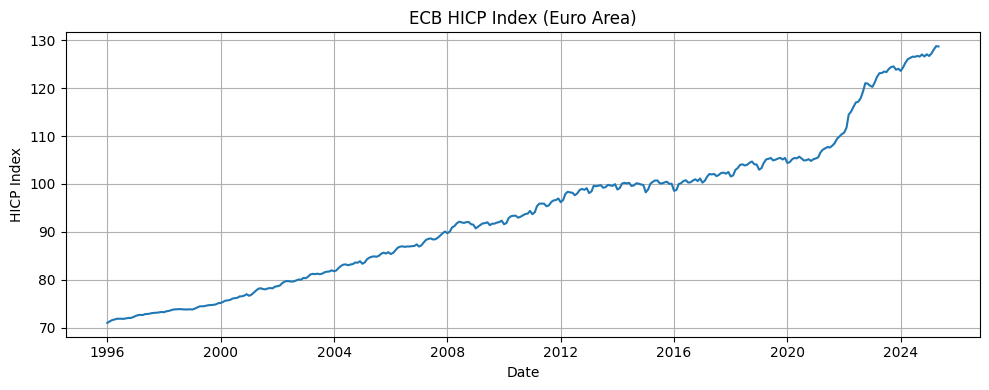

In [11]:
# Optional: Plot HICP inflation index
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["hicp_index"])
plt.title("ECB HICP Index (Euro Area)")
plt.xlabel("Date")
plt.ylabel("HICP Index")
plt.grid(True)
plt.tight_layout()
plt.show()
